data location: http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx

# Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from  matplotlib.ticker import PercentFormatter

In [2]:
plt.style.use('default')

# Access and Prepare Data

### Data location varaible

In [3]:
dataLoc='http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx'

### Access data and place into the df dataframe

In [4]:
df = pd.read_csv('wctaxrate.txt',delimiter=' ',index_col=False)

In [5]:
df.head()

,2019,2018,2017,2016*,2015,2014,2013,2012,2011,2010,...,1996,1995,1994,1993,1992*,1991,1990,1989,1988,1987
0,0.7207,0.6544,0.615,0.6005,0.6145,0.578,0.534,0.534,0.534,0.534,...,0.63,0.63,0.76,0.76,0.66,0.88,0.88,0.79,0.72,0.59


### Tranpose the data

In [70]:
df = df.transpose()

In [6]:
df.head()

,2019,2018,2017,2016*,2015,2014,2013,2012,2011,2010,...,1996,1995,1994,1993,1992*,1991,1990,1989,1988,1987
0,0.7207,0.6544,0.615,0.6005,0.6145,0.578,0.534,0.534,0.534,0.534,...,0.63,0.63,0.76,0.76,0.66,0.88,0.88,0.79,0.72,0.59


### Name the columns

In [7]:
df.columns = ['wcTax']

ValueError: Length mismatch: Expected axis has 33 elements, new values have 1 elements

In [ ]:
df.head()

### Create a column to indicate an assessment year

In [ ]:
df['Year']=df.index

In [ ]:
def assessment(x):
    if '*' in x:
        return 'yes'
    else:
        return 'no'

In [ ]:
df['assessmentYear'] = df.Year.apply(assessment)

In [ ]:
df.head()

### Remove the * from the Year column to prepare a numeric index column

##### Replace the * with a space

In [ ]:
df['Year'] = df.index
df['Year'] = df.Year.str.replace('*','')
df.head()

##### Change the data type of the Year column to integer

In [ ]:
df['Year'] = df['Year'].astype('int')

In [ ]:
df.dtypes

##### Replace the year object index with a year numeric

In [ ]:
df.set_index('Year',inplace=True)
df.head()

### Sort the index is ascending order

In [ ]:
df.sort_index(ascending=True, inplace=True)
df.head()

### Calculate the pctIncrease of taxes each year

In [ ]:
df['pctIncrease'] = df.wcTax.pct_change()

In [ ]:
df.head()

### Calculate the 5 year rolling average

In [ ]:
df['RollingAvg'] = df.wcTax.rolling(5).mean()

In [ ]:
df.head()

### Calculate the wake county tax rank

In [ ]:
df['wcTaxRank'] = df.wcTax.rank(method='min',ascending=False)

In [ ]:
df.head(10)

### Round numbers

In [ ]:
df['wcTax'] = df.wcTax.round(decimals=2)

In [ ]:
df['pctIncrease'] = df.pctIncrease.round(decimals=3)

In [ ]:
df['RollingAvg'] = df.RollingAvg.round(decimals=3)

# Explore the Data

### Preview the first 5 rows

In [ ]:
df.head()

In [ ]:
df.tail()

### View data types and missing values

In [ ]:
df.info()

### View the numeric column summary statistics

In [ ]:
df.describe().transpose()

### View the number of assessment years

In [ ]:
df.assessmentYear.value_counts()

# Analyze Data

In [ ]:
df.head()

### Calculate new dataframe without 2019 bonds called **fc**

In [ ]:
fc = df.copy()

In [ ]:
fc.tail()

In [ ]:
fc.drop(['pctIncrease'], axis=1, inplace=True)

In [ ]:
fc.tail()

In [ ]:
fc.replace(0.7207,0.7207-.0380,inplace=True)

In [ ]:
fc.tail()

In [ ]:
fc['pctIncrease'] = fc.wcTax.pct_change()

In [ ]:
fc = fc.loc[:,['wcTax','pctIncrease','RollingAvg','assessmentYear']]

In [ ]:
fc.tail()

In [ ]:
fc

In [ ]:
fc.iloc[0:len(fc)-1,1]=np.nan

In [ ]:
fc.head()

In [ ]:
fc.tail()

## Add rank column

In [ ]:
rank = df.copy()

In [46]:
rank.head()

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,23.0
1988,0.72,no,0.220339,NaN,8.0
1989,0.79,no,0.097222,NaN,3.0
1990,0.88,no,0.113924,NaN,1.0
1991,0.88,no,0.000000,0.772,1.0


In [47]:
rank.reset_index(inplace=True)
rank.set_index('wcTaxRank', inplace=True)

In [48]:
rank.sort_index(inplace=True)

In [49]:
rank.head()

,Year,wcTax,assessmentYear,pctIncrease,RollingAvg
wcTaxRank,,,,,
1.0,1990,0.88,no,0.113924,NaN
1.0,1991,0.88,no,0.000000,0.772
3.0,1989,0.79,no,0.097222,NaN
4.0,1993,0.76,no,0.151515,0.794
4.0,1994,0.76,no,0.000000,0.788


In [50]:
rank['Year']=rank.Year.astype('object')

In [51]:
rank.dtypes

Year               object
wcTax             float64
assessmentYear     object
pctIncrease       float64
RollingAvg        float64
dtype: object

In [52]:
rank.head()

,Year,wcTax,assessmentYear,pctIncrease,RollingAvg
wcTaxRank,,,,,
1.0,1990,0.88,no,0.113924,NaN
1.0,1991,0.88,no,0.000000,0.772
3.0,1989,0.79,no,0.097222,NaN
4.0,1993,0.76,no,0.151515,0.794
4.0,1994,0.76,no,0.000000,0.788


# Export to CSV

### Export Actual

In [94]:
df.to_csv('wctaxes.csv')

### Export w/o Bonds

# Visualize

In [53]:
## Set Global Appearance Colors
size=(14,10)
carolinaBlue='#4B9CD3'
ncStateRed='#CC0000'
fcColor='#83FA12'
gridAlpha=.25

## Create X axis to show every 2 years
x=df.index.to_list()[1::2]
x.append(df.index.max()+1)


## Find the min and max years to use in a title
minYear = df.index.to_list()[0]
maxYear = df.index.to_list()[len(df)-1]

## Find the min year property tax and value
minTaxYear = df.wcTax.idxmin()
minTaxValue= df.wcTax.min()

## Find the max year property tax and value
maxTaxYear = df.wcTax.idxmax()
maxTaxValue= df.wcTax.max()

## Find the current rate and year
currRate = df.iloc[len(df)-1,0]
currYear = df.index.max()

## Find the current rate, find rate without bonds
fcRate = fc.iloc[len(fc)-1,0]
fcInc = fc.iloc[len(fc)-1,1]

## Find the rate in 2007 prior ot the recession
recRate = fc.loc[2007,['wcTax']].max()

## Calculate difference between 2007 and current
diff = df.loc[(df.index==2007) | (df.index==2019),['wcTax']].copy()
diff['pctInc'] = diff.wcTax.pct_change()
diffRec =diff.pctInc.max()

## Calculate difference between 2007 and without bond rate
rate2007 = df.loc[2007]['wcTax']
fc2019 = fc.loc[2019,'wcTax']
fcdiff = pd.Series([rate2007,fc2019])
fcdiffRate = fcdiff.pct_change().iloc[1]


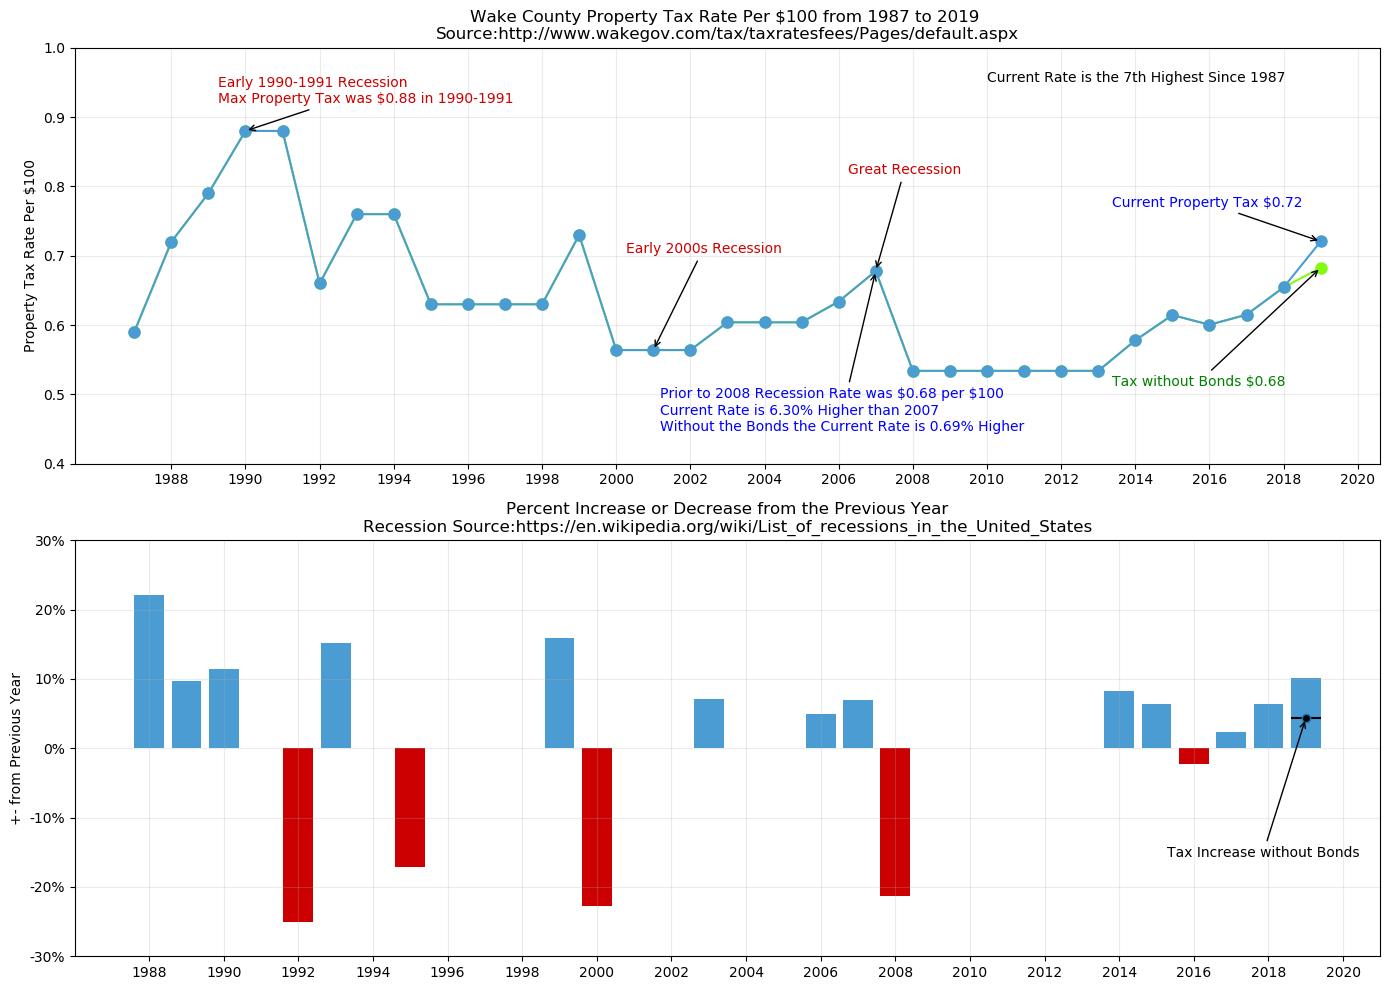

In [67]:
fig, (ax1,ax2) = plt.subplots(2,figsize=size)

###################################################################################
## Line plot ax1
ax1.plot(fc.index,fc['wcTax'], marker='o', markersize=8, color=fcColor, label='CurrentTax')
ax1.plot(df.index,df['wcTax'], marker='o', markersize=8, color=carolinaBlue, label='Without Bonds')



## Apprearance ax1
ax1.grid(alpha=gridAlpha)
ax1.set_xticks(x)
ax1.text(2010,.95,'Current Rate is the 7th Highest Since 1987')
ax1.set_title('Wake County Property Tax Rate Per $100 from {} to {} \nSource:http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx'.format(minYear, maxYear))
ax1.set_ylabel('Property Tax Rate Per $100')
ax1.set_ylim(.40,1)
#ax1.annotate('Max Property Tax was ${:.2f}\nin 1990-1991'.format(maxTaxValue),[maxTaxYear,maxTaxValue], xytext=(0.05,.3), xycoords='axes fraction')
ax1.annotate('Current Property Tax ${:.2f}'.format(currRate),[currYear,currRate], xytext=(-150,25), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color='blue')
ax1.annotate('Tax without Bonds ${:.2f}'.format(fcRate),[currYear,fcRate], xytext=(-150,-85), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color='green')
ax1.annotate('Prior to 2008 Recession Rate was ${:.2f} per \$100 \nCurrent Rate is {:.2%} Higher than 2007 \nWithout the Bonds the Current Rate is {:.2%} Higher'.format(recRate,diffRec,fcdiffRate),[2007,recRate], 
             xytext=(-155,-115), textcoords='offset points', arrowprops=dict(arrowstyle='->'), color='blue')
ax1.annotate('Early 1990-1991 Recession\nMax Property Tax was ${:.2f} in 1990-1991'.format(maxTaxValue),[1990,df.loc[1990,'wcTax']], xytext=(-20,20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color=ncStateRed)
ax1.annotate('Early 2000s Recession',[2001,df.loc[2001,'wcTax']], xytext=(-20,70), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color=ncStateRed)
ax1.annotate('Great Recession',[2007,df.loc[2007,'wcTax']], xytext=(-20,70), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), color=ncStateRed)
###################################################################################
## Bar plot ax2
ax2.plot(fc.index,fc['pctIncrease'], marker='o', markerfacecolor='black')
ax2.bar(df.index,df['pctIncrease'], color=(df['pctIncrease'] > 0).map({True: carolinaBlue,
                                                                      False: ncStateRed}))

##Appearnace ax2
ax2.hlines(fcInc,2018.6,2019.4, color='k')
ax2.grid(alpha=gridAlpha)
ax2.set_xticks(x)
ax2.set_ylim(-.3,.3)
ax2.set_title('Percent Increase or Decrease from the Previous Year\nRecession Source:https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States')
ax2.set_ylabel('+- from Previous Year')
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.annotate('Tax Increase without Bonds',[2019,fc.loc[2019,'pctIncrease']], xytext=(-100,-100), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

###################################################################################
## Bar plot for ranks

fig.tight_layout()
plt.savefig('wcTax.jpg')